<a href="https://colab.research.google.com/github/akshayush/Convolution_Neural_Networks/blob/master/LargeCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DataSet, transformations and visualisation


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim

In [113]:
device=torch.device("cuda:0" if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [0]:
transforms_train=transforms.Compose([
   transforms.RandomResizedCrop(224),
   transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])
transforms_test=transforms.Compose([
    transforms.RandomResizedCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

In [115]:
trainset=torchvision.datasets.CIFAR10(root="./data",train=True,download=True,transform=transforms_train)
testset=torchvision.datasets.CIFAR10(root="./data",train=False,download=True,transform=transforms_test)

Files already downloaded and verified
Files already downloaded and verified


In [0]:
num_classes=10
batch_size=4
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)

In [51]:
dataiter=iter(trainloader)
images,labels=dataiter.next()
print(images.shape)
print(images[1].shape)
print(labels[1].item())

torch.Size([4, 3, 224, 224])
torch.Size([3, 224, 224])
0


In [0]:
def imshow(img,title):
    npimg=img.numpy()/2+0.5 ## again denormalising 
    plt.figure(figsize=(batch_size,1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.title(title)
    plt.show()

def show_batch_images(dataloader):
    images,labels=next(iter(dataloader))
    img=torchvision.utils.make_grid(images)
    imshow(img,title=[str(x.item()) for x in labels])
    

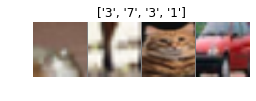

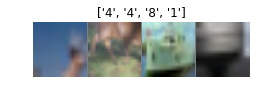

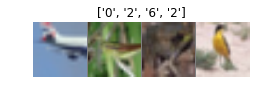

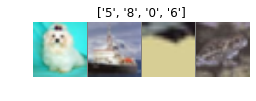

In [58]:
for i in range(4):
    show_batch_images(trainloader)

Creating VGG-16

In [0]:
from torchvision import models
vgg=models.vgg16_bn()

In [62]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [63]:
print(vgg.features)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (9): ReLU(inplace)
  (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (12): ReLU(inplace)
  (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (14): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): BatchNor

In [66]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [70]:
final_in_features=vgg.classifier[6].in_features
mod_classifier=list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [73]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

Train CIFAR10

In [0]:
batch_size=16
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
def evaluation(dataloader,model):
    total,correct=0,0
    for data in dataloader:
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        outputs=model(inputs)
        _,pred=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct += (pred==labels).sum().item()
        return 100 * correct/total

In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)


In [82]:
loss_epoch_arr=[]
max_epochs=1


n_iters=np.ceil(50000/batch_size)
for epoch in range(max_epochs):
    for i, data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        
        opt.zero_grad()
        
        outputs=vgg(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        
        opt.step()
        
        del inputs,labels,outputs
        torch.cuda.empty_cache()
        
        if i%100==0:
            print("Interation: %d/%d, Loss : %0.2f" % (i,n_iters,loss.item()))
    loss_epoch_arr.append(loss.item())
    print('Epoch: %d/%d , Test Accuracy: %0.2f, Train Accuracy: %0.2f'% (
        epoch, max_epochs,
        evaluation(testloader,vgg),evaluation(trainloader,vgg)))
    

plt.plot(loss_epoch_arr)
plt.show()
        
        

Interation: 0/313, Loss : 2.31
Interation: 100/313, Loss : 2.28
Interation: 200/313, Loss : 2.28
Interation: 300/313, Loss : 2.63
Interation: 400/313, Loss : 2.14
Interation: 500/313, Loss : 2.27
Interation: 600/313, Loss : 2.16
Interation: 700/313, Loss : 2.08
Interation: 800/313, Loss : 2.10
Interation: 900/313, Loss : 1.82
Interation: 1000/313, Loss : 2.25
Interation: 1100/313, Loss : 2.04
Interation: 1200/313, Loss : 2.08
Interation: 1300/313, Loss : 1.85
Interation: 1400/313, Loss : 2.24
Interation: 1500/313, Loss : 1.97
Interation: 1600/313, Loss : 2.31


KeyboardInterrupt: ignored

Freeze layers of Convolutional Layers
Working with pretrained models

In [0]:
batch_size=16
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [84]:
vgg=models.vgg16_bn(pretrained=True)

Downloading: "https://download.pytorch.org/models/vgg16_bn-6c64b313.pth" to /root/.cache/torch/checkpoints/vgg16_bn-6c64b313.pth
100%|██████████| 553507836/553507836 [00:06<00:00, 84869251.60it/s]


In [0]:
for param in vgg.parameters():
    param.requires_grad=False

In [0]:
final_in_features=vgg.classifier[6].in_features
vgg.classifier[6]=nn.Linear(final_in_features,num_classes)

In [94]:
for param in vgg.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 4096])
torch.Size([10])


In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)


In [103]:
loss_epoch_arr=[]
max_epochs=1

n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        opt.zero_grad()
        outputs=vgg(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        
        opt.step()
        
        if i%100 ==0:
            print("Iterations: %d/%d  Loss: %0.2f" % (i,n_iters,loss.item()))

        del inputs,data,outputs
        torch.cuda.empty_cache()
    loss_epoch_arr.append(loss.item())
    print("Epoch : %d/%d, Test Accuracy: %0.2f, Train Accuracy : %0.2f" %(
            epoch, max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
plt.plot(loss_epoch_arr)
plt.show()

Iterations: 0/3125  Loss: 2.37
Iterations: 100/3125  Loss: 1.59
Iterations: 200/3125  Loss: 2.33
Iterations: 300/3125  Loss: 2.16
Iterations: 400/3125  Loss: 2.15
Iterations: 500/3125  Loss: 2.14
Iterations: 600/3125  Loss: 2.22
Iterations: 700/3125  Loss: 1.35
Iterations: 800/3125  Loss: 1.92
Iterations: 900/3125  Loss: 2.33
Iterations: 1000/3125  Loss: 2.70
Iterations: 1100/3125  Loss: 1.18
Iterations: 1200/3125  Loss: 2.49
Iterations: 1300/3125  Loss: 2.20
Iterations: 1400/3125  Loss: 3.43
Iterations: 1500/3125  Loss: 2.73
Iterations: 1600/3125  Loss: 0.81
Iterations: 1700/3125  Loss: 2.19
Iterations: 1800/3125  Loss: 1.52
Iterations: 1900/3125  Loss: 2.30
Iterations: 2000/3125  Loss: 2.74
Iterations: 2100/3125  Loss: 2.59
Iterations: 2200/3125  Loss: 1.76
Iterations: 2300/3125  Loss: 1.69
Iterations: 2400/3125  Loss: 2.66
Iterations: 2500/3125  Loss: 1.54
Iterations: 2600/3125  Loss: 2.34
Iterations: 2700/3125  Loss: 2.78
Iterations: 2800/3125  Loss: 2.66
Iterations: 2900/3125  Los

UnboundLocalError: ignored

Checkpointing Models


In [0]:
import copy

Min Loss: 1.62
Iterations: 0/3125  Loss: 1.62
Min Loss: 1.50
Min Loss: 1.37
Min Loss: 1.34
Min Loss: 0.84
Min Loss: 0.71
Iterations: 100/3125  Loss: 2.46
Min Loss: 0.59
Iterations: 200/3125  Loss: 2.47
Iterations: 300/3125  Loss: 2.61
Min Loss: 0.48
Iterations: 400/3125  Loss: 2.44
Iterations: 500/3125  Loss: 1.54
Iterations: 600/3125  Loss: 1.79
Iterations: 700/3125  Loss: 1.78
Iterations: 800/3125  Loss: 3.63
Iterations: 900/3125  Loss: 1.76
Iterations: 1000/3125  Loss: 1.56
Iterations: 1100/3125  Loss: 1.96
Iterations: 1200/3125  Loss: 1.86
Iterations: 1300/3125  Loss: 2.29
Iterations: 1400/3125  Loss: 2.56
Iterations: 1500/3125  Loss: 1.93
Iterations: 1600/3125  Loss: 2.00
Iterations: 1700/3125  Loss: 2.23
Iterations: 1800/3125  Loss: 2.31
Iterations: 1900/3125  Loss: 3.41
Iterations: 2000/3125  Loss: 0.73
Iterations: 2100/3125  Loss: 1.49
Iterations: 2200/3125  Loss: 2.58
Iterations: 2300/3125  Loss: 2.96
Iterations: 2400/3125  Loss: 1.82
Iterations: 2500/3125  Loss: 3.13
Iteratio

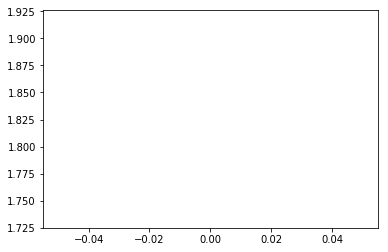

In [108]:
loss_epoch_arr=[]
max_epochs=1
min_loss=100
n_iters=np.ceil(50000/batch_size)

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        opt.zero_grad()
        outputs=vgg(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        
        opt.step()
        if min_loss>loss.item():
            min_loss=loss.item()
            best_model=copy.deepcopy(vgg.state_dict())
            print('Min Loss: %0.2f' % min_loss)
        if i%100 ==0:
            print("Iterations: %d/%d  Loss: %0.2f" % (i,n_iters,loss.item()))

        del inputs,data,outputs
        torch.cuda.empty_cache()
    loss_epoch_arr.append(loss.item())
    print("Epoch : %d/%d, Test Accuracy: %0.2f, Train Accuracy : %0.2f" %(
            epoch, max_epochs,evaluation(testloader,vgg),evaluation(trainloader,vgg)))
plt.plot(loss_epoch_arr)
plt.show()

In [118]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg),evaluation(testloader,vgg))

RuntimeError: ignored

Residual Network

In [119]:
resnet=models.resnet18(pretrained=True)
print(resnet)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace)
      (conv2): Co

In [0]:
for param in resnet.parameters():
    param.requires_grad=False

In [0]:
in_features=resnet.fc.in_features
resnet.fc=nn.Linear(in_features,num_classes)

In [123]:
for param in resnet.parameters():
    if param.requires_grad:
        print(param.shape)

torch.Size([10, 512])
torch.Size([10])


In [0]:
resnet=resnet.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(params=resnet.parameters(),lr=0.01)

Min Loss 2.47
Iteration : 0/3125, Loss: 2.47
Min Loss 2.23
Min Loss 2.04
Min Loss 1.89
Min Loss 1.75
Min Loss 1.60
Iteration : 100/3125, Loss: 1.68
Min Loss 1.53
Min Loss 1.52
Min Loss 1.40
Min Loss 1.36
Min Loss 1.25
Iteration : 200/3125, Loss: 1.63
Min Loss 1.23
Min Loss 1.09
Iteration : 300/3125, Loss: 1.67
Min Loss 1.04
Min Loss 1.00
Iteration : 400/3125, Loss: 1.57
Min Loss 0.98
Iteration : 500/3125, Loss: 1.01
Min Loss 0.92
Iteration : 600/3125, Loss: 1.30
Min Loss 0.91
Min Loss 0.87
Iteration : 700/3125, Loss: 1.89
Min Loss 0.82
Iteration : 800/3125, Loss: 1.64
Min Loss 0.74
Iteration : 900/3125, Loss: 1.63
Iteration : 1000/3125, Loss: 1.69
Iteration : 1100/3125, Loss: 1.29
Min Loss 0.71
Iteration : 1200/3125, Loss: 1.57
Min Loss 0.70
Iteration : 1300/3125, Loss: 0.70
Min Loss 0.68
Iteration : 1400/3125, Loss: 1.61
Iteration : 1500/3125, Loss: 1.52
Min Loss 0.66
Iteration : 1600/3125, Loss: 1.30
Iteration : 1700/3125, Loss: 1.29
Iteration : 1800/3125, Loss: 1.22
Iteration : 1900

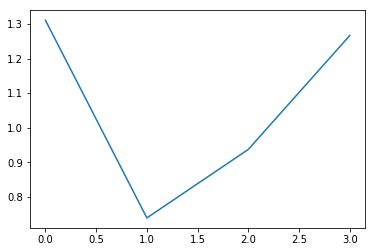

In [127]:
loss_epoch_arr=[]
max_epochs=4

min_loss=100

n_iters=np.ceil(50000/batch_size)
for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        opt.zero_grad()
        outputs=resnet(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()
        
        if min_loss>loss.item():
            min_loss=loss.item()
            best_model=copy.deepcopy(resnet.state_dict())
            print("Min Loss %0.2f"% min_loss)
        if i%100==0:
            print("Iteration : %d/%d, Loss: %0.2f" % (i,n_iters,loss.item()))
            
        del inputs,labels,outputs
        torch.cuda.empty_cache()
        
    loss_epoch_arr.append(loss.item())
    print('Epoch : %d/%d, Test Accuracy : %0.2f, Train Accuracy: %0.2f'% (
    epoch,max_epochs,evaluation(testloader,resnet),evaluation(trainloader,resnet)))
plt.plot(loss_epoch_arr)
plt.show()
        

In [128]:
resnet.load_state_dict(best_model)
print(evaluation(trainloader,resnet),evaluation(testloader,resnet))

68.75 62.5


Inception 

In [0]:
inception=models.inception_v3(pretrained=True)
for param in inception.parameters():
    param.requires_grad=False